In [1]:

seed = 43
import random
random.seed(seed)

import torch
torch.manual_seed(seed)

import numpy as np
np.random.seed(seed)

import matplotlib.pyplot as plt
from datasets.primitive.marked_integer_dataset import MixedSprites3Dataset

from datasets.primitive.shape3 import Shapes3Dataset

dataset_size =2048
test_size = 256

percent = 1.0
train_dataset = MixedSprites3Dataset(dataset_size=dataset_size// 1, p = percent, unary = 0.6)  # create a dataset with 1024 samples
test_dataset = MixedSprites3Dataset(dataset_size=test_size, p = percent, unary = 0.6)  # create a dataset with 128 samples for testing

#train_dataset = Shapes3Dataset(dataset_size = 1024)
#test_dataset = Shapes3Dataset(dataset_size = 128)

corpus = [data[1]["query"] for data in train_dataset]

#from data.collect_corpus import write_vocab, load_corpus, build_vocab
#vocab = build_vocab([] + corpus)
##write_vocab(vocab)


In [3]:
from core.model import MetaLearner
learner = MetaLearner([])
learner.load_ckpt("outputs/checkpoints/prototype")
### load the meta learner from the pretrained-checkpoint
pass


18 18:24:15 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
18 18:24:15 WRN `SearchExecutor` The input domain is empty, creating an empty domain
18 18:24:15 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
18 18:24:15 WRN `SearchExecutor` The input domain is empty, creating an empty domain


# Base Knowledge Learning


18 18:24:17 Filter dataset None: #before=2048, #after=2048.
18 18:24:17 Filter dataset None: #before=256, #after=256.


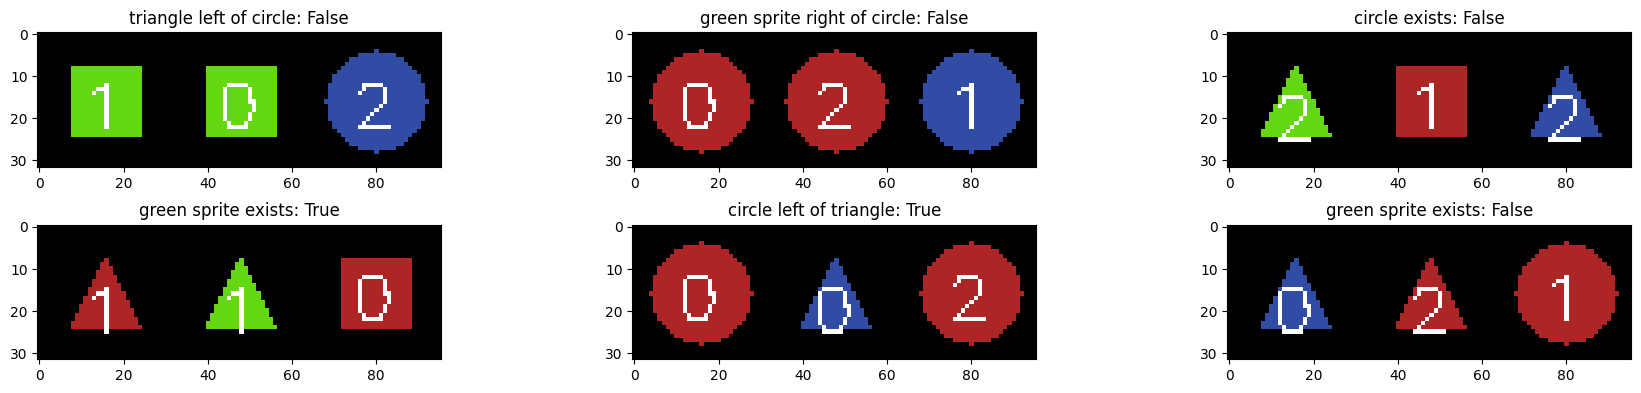

In [4]:
from core.learn import AutoLearnSchedule
from helchriss.logger import set_logger_output_file

valid_types = ["boolean"]
train_logic_dataset = train_dataset.filter(lambda x : x["question_type"] in valid_types)
test_logic_dataset = test_dataset.filter(lambda x : x["question_type"] in valid_types)

# Now let's visualize a few samples from the dataset:
"arithmetic"

plt.figure(figsize=(18, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    #print(train_logic_dataset[i]['image'].permute(1, 2, 0).numpy()[...,::-1].shape)
    plt.imshow(train_logic_dataset[i]['image'].permute(1, 2, 0).numpy())
    plt.title(train_logic_dataset[i]['query'] + ': ' + str(train_dataset[i]['answer']))
    #stprint(train_dataset[i])
plt.tight_layout()
plt.show()



In [5]:

learner.cheat = 1
#learner.executor.supressed = 1
set_logger_output_file(f"outputs/logs/expr_{dataset_size // 1}.txt")
schedule = AutoLearnSchedule(train_logic_dataset, test_logic_dataset)

#schedule.procedual_train(learner, lr = 1e-3)
#learner.save_ckpt("outputs/checkpoints/logic")

18 18:24:20 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
18 18:24:20 WRN `SearchExecutor` The input domain is empty, creating an empty domain
18 18:24:20 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
18 18:24:20 WRN `SearchExecutor` The input domain is empty, creating an empty domain


red [0 1 1]
red count is : 2
green [0 0 0]
green count is : 0
blue [1 0 0]
blue count is : 1
circle [0 0 1]
circle count is : 1
rectangle [0 0 0]
rectangle count is : 0
triangle [1 1 0]
triangle count is : 2
relations:

left [1 1 0]
right [0 0 0]


/Users/sunyiqi/Documents/GitHub/MetaLearner/core/metaphors/executor.py:695: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_info = (node_id, son_id, {"weight":float(torch.exp(torch.tensor(-subloss)) )})
/Users/sunyiqi/Documents/GitHub/MetaLearner/domains/logic/fol_domain.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_info = (node_id, son_id, {"weight":float(torch.exp(torch.tensor(-subloss)) )})


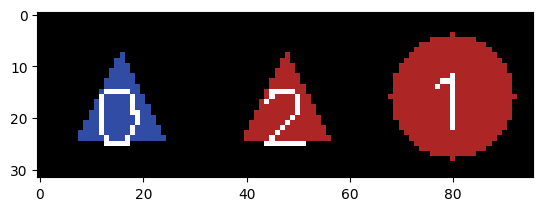

In [6]:
from core.model import MetaLearner
learner = MetaLearner([])
learner.load_ckpt("outputs/checkpoints/logic")

i = 5
img = train_logic_dataset[i]['image']
grounding = {"image": img}
plt.imshow(img.permute(1, 2, 0).numpy())

tags = ["red","green", "blue", "circle", "rectangle", "triangle"]

rels = ["left", "right"]

for tag in tags:
    program = f"filter:Logic(scene:Objects(), {tag}:Objects )"
    measure, _ = learner.executor.additive_evaluation(program, grounding)
    print(tag,(measure.value[:,0].sigmoid() + 0.5).int().detach().numpy())

    program = f"count:Logic( filter:Logic(scene:Objects(), {tag}:Objects ) )"
    measure, _ = learner.executor.additive_evaluation(program, grounding)
    print(f"{tag} count is : {int(measure.value +0.5)}")

print("relations:\n")

tag = "circle:Objects"
for rel in rels:
    program = f"relate:Logic(filter:Logic(scene:Objects(), {tag}), scene:Objects(), {rel}:Objects )"

    measure, _ = learner.executor.additive_evaluation(program, grounding)

    print(rel,(measure.value[:,0].sigmoid() + 0.5).int().detach().numpy())
    

In [ ]:
#learner.save_ckpt("outputs/checkpoints/logic") #avg_loss=3.0656, avg_acc=0.5201


# Continual Learning Concepts
MetaLearner can continually learning new concepts using only language description of the new word and the related domain entries.

In [ ]:
valid_types = ["boolean", "arithmetic"]
percent = 0.3
train_dataset = MixedSprites3Dataset(dataset_size=dataset_size// 1, p = percent, unary = 0.5)  #
test_dataset = MixedSprites3Dataset(dataset_size=test_size, p = percent, unary = 0.5)

train_arith_dataset = train_dataset.filter(lambda x : x["question_type"] in valid_types)
test_arith_dataset = test_dataset.filter(lambda x : x["question_type"] in valid_types)

# Now let's visualize a few samples from the dataset:
"arithmetic"

plt.figure(figsize=(18, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_arith_dataset[i]['image'].permute(1, 2, 0).numpy())
    plt.title(train_arith_dataset[i]['query'] + ': ' + str(train_dataset[i]['answer']))
    #stprint(train_dataset[i])
plt.tight_layout()
plt.show()


In [ ]:
from core.model import MetaLearner
learner = MetaLearner([])
learner.cheat = 1
learner.load_ckpt("outputs/checkpoints/logic")

schedule = AutoLearnSchedule(train_arith_dataset, test_arith_dataset)

#schedule.procedual_train(learner, lr = 2e-4)
#learner.save_ckpt("outputs/checkpoints/max1")

In [ ]:
from core.model import MetaLearner
learner = MetaLearner([])
learner.load_ckpt("outputs/checkpoints/max1")
learner.cheat = 1

i = 9
img = train_arith_dataset[i]['image']
grounding = {"image": img}
plt.imshow(img.permute(1, 2, 0).numpy())

tags = ["red","green", "blue", "circle", "rectangle", "triangle"]

tag1 = "green"
tag2 = "circle"

program = f"plus:Integer(filter:Logic(scene:Objects(), {tag1}:Objects ), filter:Logic(scene:Objects(), {tag2}:Objects ))"

program = f"max:Integer(scene:Objects() )"
#program = f"count:Logic(filter:Logic(scene:Objects(), {tag1}:Objects ))"

from core.model import value_types, UnificationFailure

try:
    measure, _ = learner.executor.additive_evaluation(program, grounding)
except UnificationFailure as e:
    print("Unify:",e.left_structure, value_types(e.right_structure))
    learner.executor.update_chain(e.right_structure, e.left_structure)

print("Progam Value:",program,measure.value)


# Euclid Domain for Path and Container

In [1]:

if __name__ == "__main__":
    from domains.math.euclid_domain import euclid_executor
    from datasets.primitive.euclid_dataset import generate_constrained_scene

    
    # Generate constrained scene
    scene_img, scene_meta = generate_constrained_scene(euclid_executor)
    
    # Print metadata (DSL program + object specs)
    print(f"\nScene Metadata: {scene_meta['objects']}")
    
    # Save rendered scene
    import PIL.Image as Image
    img_np = (scene_img.permute(1,2,0).cpu().numpy() * 255).astype("uint8")
    Image.fromarray(img_np).save("constrained_scene_example.png")
    print("Constrained scene saved as 'constrained_scene_example.png'")

18 18:46:09 Function start automatically registered.
18 18:46:09 Function end automatically registered.
18 18:46:09 Function on_line automatically registered.
18 18:46:09 Function length automatically registered.
18 18:46:09 Function intersect automatically registered.
18 18:46:09 Function parallel automatically registered.
18 18:46:09 Function perpendicular automatically registered.
18 18:46:09 Function connect_segment automatically registered.
18 18:46:09 Function center automatically registered.
18 18:46:09 Function radius automatically registered.
18 18:46:09 Function on_radius automatically registered.
18 18:46:09 Function inside automatically registered.
18 18:46:09 Function outside automatically registered.
18 18:46:09 Function contain automatically registered.
18 18:46:09 Function intersect_line_circle automatically registered.
18 18:46:09 Function tangent automatically registered.
18 18:46:09 Function contained_line automatically registered.


Generated DSL Program:
l1:line(p1,p2)[color(blue)]
l2:line(p2,p3)[perpendicular(l2, l1),color(green)]
l3:line(p3,p4)[perpendicular(l3, l2),color(red)] 
l4:line(p4,p1)[color(blue)]

Scene Metadata: [{'name': 'l1', 'type': 'line', 'geometry': tensor([218.6968, 147.6919,  91.5083, 161.4101]), 'color_name': 'blue', 'color_rgb': tensor([0.8386, 0.6447, 1.0000])}, {'name': 'l2', 'type': 'line', 'geometry': tensor([ 91.5083, 161.4101,  80.4503,  58.8860]), 'color_name': 'green', 'color_rgb': tensor([0., 1., 0.])}, {'name': 'l3', 'type': 'line', 'geometry': tensor([ 80.4503,  58.8860, 142.7023,  52.1717]), 'color_name': 'red', 'color_rgb': tensor([1.0000, 0.0000, 0.5743])}, {'name': 'l4', 'type': 'line', 'geometry': tensor([142.7023,  52.1717, 218.6968, 147.6919]), 'color_name': 'blue', 'color_rgb': tensor([0., 0., 1.])}]
Constrained scene saved as 'constrained_scene_example.png'


In [31]:

from core.model import MetaLearner

learner = MetaLearner([])

learner.load_ckpt("outputs/checkpoints/max1")

learner.executor.parser.supress = 1
learner.cheat = 1

program  = "plus(one(), Z())"
parses = learner.executor.parser.parse(program)


for parse in parses:
    print(parse.fn)
    print(parse.word)


#for entry in learner.executor.parser._entries:print(entry.fn,entry)

19 15:46:28 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
19 15:46:28 WRN `SearchExecutor` The input domain is empty, creating an empty domain
19 15:46:28 Function one automatically registered.
19 15:46:28 Function two automatically registered.
19 15:46:28 Function three automatically registered.
19 15:46:28 Function plus automatically registered.
19 15:46:28 Function minus automatically registered.
19 15:46:28 Function mul automatically registered.
19 15:46:28 Function avg automatically registered.
19 15:46:28 Function smaller automatically registered.
19 15:46:28 Function bigger automatically registered.
19 15:46:28 Function N automatically registered.
19 15:46:28 Function Z automatically registered.
19 15:46:28 Function max automatically registered.
19 15:46:28 Function subset automatically registered.
19 15:46:28 Function exists automatically registered.
19 15:46:28 Function forall automatically registered.
19 15:46:28 Function iota automatically registere

plus:Integer(one:Integer(),Z:Integer())
plus(one(),Z())


In [ ]:
from core.metaphors.types import find_transform_path, TransformRule, PatternVar
from helchriss.dsl.dsl_types import FLOAT, ListType, VectorType, EmbeddingType, TypeBase
from typing import Dict

if __name__ == "__main__":

        # source type : List[Vector[float, 3]]",
        initial_type = ListType(element_type=VectorType(elem_type=FLOAT, dim=3),
        )
        # target type：List[Embedding["vec3", 3]]",
        target_type = ListType(element_type=EmbeddingType(space_name="vec3", dim=3),
        )
    
        rule_pattern = ListType(
            element_type=VectorType(elem_type=PatternVar("n"), dim=PatternVar("d"))  # $d匹配任意维度\n",
        )

        def vec_to_embedding(bindings: Dict[str, TypeBase]) -> TypeBase:
            d = bindings["d"] 
            return ListType(
                element_type=EmbeddingType(space_name="vec3", dim=d),
            )
        transform_rule = TransformRule(
            source_pattern=rule_pattern,
            transform_func=vec_to_embedding,
        )

        path = find_transform_path(
            initial_type=initial_type,
            target_type=target_type,
            rules=[transform_rule],
            max_depth=3,
        )
        if path is not None:
            print(f"Found path from {initial_type} to {target_type}"),

            for i, (rule, bindings) in enumerate(path):
                print(f"step{i+1} apply rule on the binding:"),
                for var, typ in bindings.items():
                    print(f"  {var} = {typ}"),
            print()
        else:
            print(f"cannot transform from {initial_type} to {target_type}"),



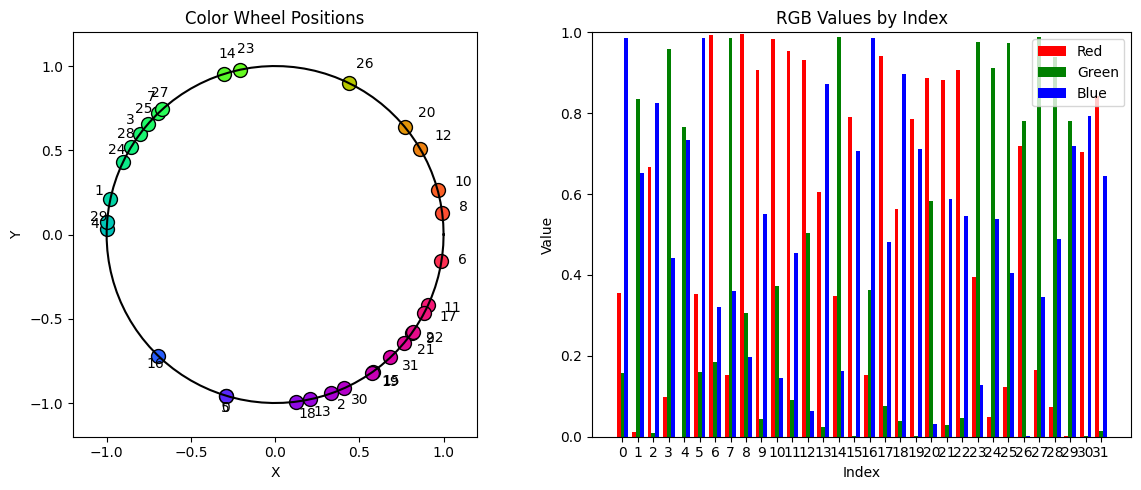

In [38]:
from domains.visual.color_domain import color_executor
if __name__ == "__main__":
    import torch
    colors = torch.randn([32,1])
    color_executor.visualize(colors)